# Đại số tuyến tính giản lược với numpy

# Bài 3: Ma trận


**BS Lê Ngọc Khả Nhi**

# Giới thiệu

Trong bài trước, chúng ta đã làm quen với cấu trúc dữ liệu vô hướng (scalar) và 1 chiều là vector, và thực hiện các phép tính trên vector. Tuy nhiên, ta sẽ nhanh chóng nhận thấy rằng nếu chỉ dùng duy nhất vector là không đủ để giải quyết các vấn đề trong thực tế. Khi làm thống kê, ta phải xử lý đồng thời nhiều biến và/hoặc nhiều đơn vị quan sát. Như vậy, ta cần một cấu trúc dữ liệu khác cho phép xử lý hàng loạt vectors cùng kích thước, đó là ma trận (matrix).

Một cách đơn giản, các bạn có thể hình dung về ma trận như 1 bảng dữ liệu 2 chiều, là kết quả của việc ghép  nhiều vector cùng kích thước lại với nhau theo chiều dọc (các vector hàng) hoặc chiều ngang (các vector cột).

## Ma trận trong lập trình thống kê

Ma trận có vai trò rất quan trọng khi thực hành thống kê (và Machine learning). Bạn sẽ thấy ma trận hiện diện ở khắp mọi nơi và tham gia vào các bài toán thống kê. 

Thí dụ ma trận được dùng như dữ liệu đầu vào của phân tích hồi quy, phân tích phương sai, kiểm định thống kê, hàm đồ họa để vẽ các biểu đồ .

Trong thí dụ sau, Nhi lấy bộ dữ liệu IRIS gồm 150 đơn vị quan sát và 4 biến số, và rút ngẫu nhiên 25 hàng, kết quả sẽ là 1 cấu trúc 2 chiều 25 hàng x 4 cột, đây chính là một ma trận 25x4

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns

In [3]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv', index_col = 0)

df_mat = df.sample(25).iloc[:,:-1].values

df_mat.shape

(25, 4)

In [5]:
df_mat

array([[7.7, 3. , 6.1, 2.3],
       [6.2, 2.9, 4.3, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.2, 3.5, 1.5, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [5.7, 2.8, 4.5, 1.3],
       [4.9, 3.6, 1.4, 0.1],
       [6.7, 3. , 5.2, 2.3],
       [4.8, 3. , 1.4, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [5.8, 2.8, 5.1, 2.4],
       [7.2, 3.6, 6.1, 2.5],
       [7.4, 2.8, 6.1, 1.9],
       [6. , 2.9, 4.5, 1.5],
       [7.7, 2.6, 6.9, 2.3],
       [6.4, 2.9, 4.3, 1.3],
       [5. , 3. , 1.6, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [6.1, 3. , 4.9, 1.8],
       [5.2, 4.1, 1.5, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [7.7, 2.8, 6.7, 2. ]])

Biểu đồ heatmap chính là hình ảnh của một ma trận 2 chiều:

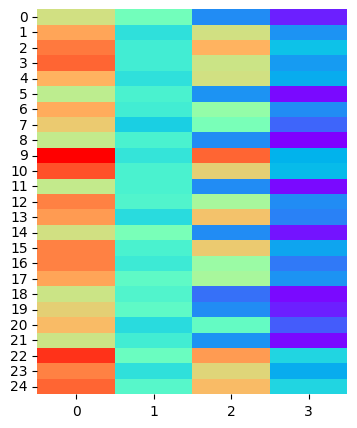

In [79]:
plt.rcParams["figure.figsize"] = (4,5)

sns.heatmap(df_mat, 
            cbar=False,
           cmap = 'rainbow')

plt.show()

Ngoài ra, ma trận còn được dùng để lưu trữ dữ liệu bản đồ địa lý, sơ đồ mạng (network, graph). Nó còn xuất hiện như các thực thể riêng biệt, yếu tố trung gian hay kết quả đầu ra trong nhiều quy trình thống kê, như ma trận hiệp phương sai (covariance matrix), ma trận tương quan (correlation matrix), ma trận xác suất chuyển tiếp (transition probability matrix), ma trận nhầm lẫn/bảng chéo (contingency table, confusion matrix)....

## Ma trận như numpy array 2 chiều

Ta hoàn toàn có thể dùng nested list trong Python để tạo ra matrix, tuy nhiên sử dụng những thư viện như numpy, tensorflow hay pytorch cung cấp nhiều tiện ích hơn khi thao tác và tính toán trên ma trận, do đó ta thường dùng numpy array 2D hoặc tensor 2D để tạo lập matrix.

Trong thí dụ trên, khi dùng pd.DataFrame.values, ta đã chuyển dataframe thành 1 numpy array 2 chiều. 

Thí dụ khác, với kích thước array đầu ra 4 hàng x 3 cột, hàm np.random.normal sẽ sinh ra một ma trận 2 chiều 4x3:

In [6]:
# M là 1 ma trận 4 hàng x 3 cột

np.random.seed(123)

M = np.random.normal(0,1,size = (4,3))

M

array([[-1.0856306 ,  0.99734545,  0.2829785 ],
       [-1.50629471, -0.57860025,  1.65143654],
       [-2.42667924, -0.42891263,  1.26593626],
       [-0.8667404 , -0.67888615, -0.09470897]])

Khi hình dung ma trận như array 2 chiều, bạn sẽ nhận ra ma trận cũng là bộ phận trong một cấu trúc phức tạp hơn - là tensor đa chiều. Thí dụ tensor 3 chiều có thể xem là tập hợp của nhiều lớp matrix 2 chiều.

Trong thí dụ sau đây, ta thấy nội dung 1 tấm ảnh kĩ thuật số có thể được tải vào array 3 chiều:

In [7]:
img = mpimg.imread('./sample.jpg')

print(img.shape)

(763, 652, 3)


array 3 chiều này có kích thước 763 (chiều cao) x 652 (chiều rộng) x 3 (chiều sâu). 

Con số 3 này gợi ý rằng 1 tensor 3D có thể xem như 3 array 2D (ma trận) có kích thước 763 x 652 xếp chồng lên nhau. 
Mỗi ma trận này chính là 1 kênh mã hóa màu sắc cho hình ảnh, mỗi ô trong ma trận có 256 bậc giá trị.

In [9]:
print(img[:, :, 0].shape)

img[:, :, 0]

(763, 652)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

Theo cùng cơ chế vẽ heatmap như trên, nếu ta biểu diễn ma trận img[:, :, 0] này thành heatmap, ta sẽ nhìn thấy 1 hình đơn sắc:

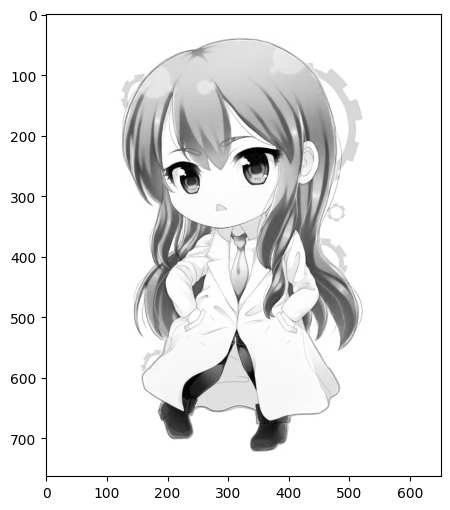

In [81]:
plt.rcParams["figure.figsize"] = (6,6)

plt.imshow(img[:, :, 0], cmap = 'Greys_r')
plt.show()

Khi tập trung vào 1 ma trận nhỏ hơn với kích thước 200x200, ta có thể phóng to một vùng của tấm ảnh:

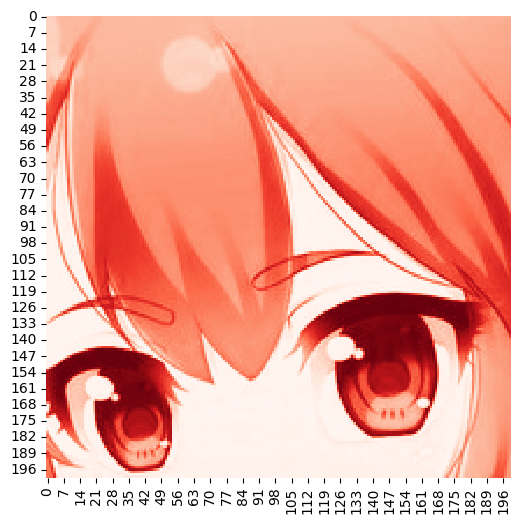

In [46]:
plt.rcParams["figure.figsize"] = (6,6)

sns.heatmap(img[100:300,200:400,0], cbar=False, cmap = 'Reds_r')
plt.show()

Việc chuẩn hóa giá trị của ma trận (chia cho 255) không làm thay đổi hình ảnh mà nó biểu thị, bây giờ ta có thể nhận ra bản chất của tấm ảnh chỉ là array gồm những con số...

Đây là cơ chế để dùng hình ảnh như dữ liệu đầu vào cho các mô hình Machine learning, cơ sở của Deep learning và Computer vision.

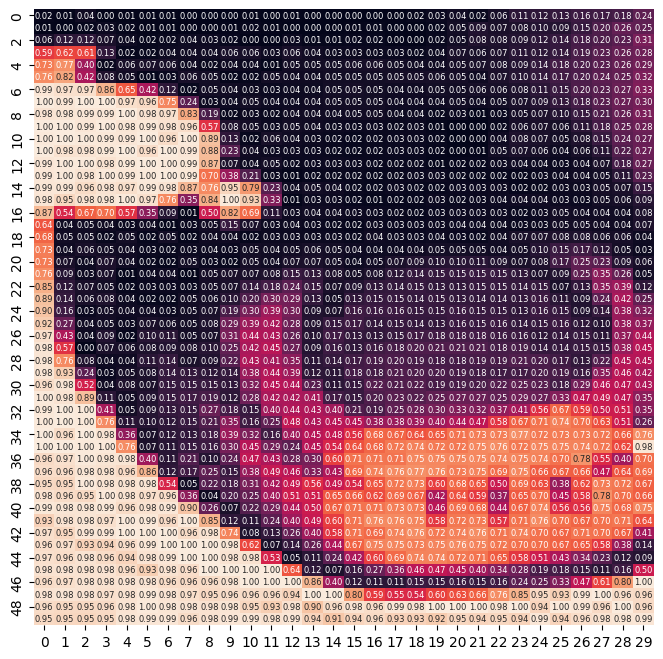

In [44]:
plt.rcParams["figure.figsize"] = (8,8)

sns.heatmap(img[250:300,220:250,0]/255, 
            cbar=False, 
            annot=True, 
            fmt='.2f',
            annot_kws={"size":6})
plt.show()

Tuy nhiên, ta không đi xa hơn về tensor, nhưng sẽ quay lại với ma trận, vì mục tiêu của loạt bài này nhắm đến là ứng dụng thống kê mà mức độ phức tạp được giới hạn ở array 2 chiều.

Khác với ngôn ngữ R, Python có mức độ tương thích và nhất quán rất cao giữa những những thư viện thống kê, Machine learning và đồ họa. trong hầu hết trường hợp, các hàm và method của những thư viện này có thể chấp nhận dữ liệu đầu vào là numpy array hoặc pandas dataframe; các thư viện tính toán trên GPU sử dụng tensor cũng cho phép hoán chuyển từ tensor thành numpy array. Bản thân pandas cũng dựa trên numpy và có thể hoán chuyển dễ dàng dataframe thành numpy array.

Do đó, việc nắm vững thao tác numpy array sẽ giúp ích rất nhiều trong hành trình đi từ dữ liệu đầu vào đến kết quả đầu ra của phân tích thống kê. Khi bạn viết code thủ công cho thuật toán thống kê, kỹ năng thao tác numpy array càng quan trọng.

## Phần tử trong ma trận

Sự khác biệt giữa matrix và dataframe, đó là dữ liệu trong ma trận mặc định phải cùng kiểu, thí dụ cùng là int (số nguyên: -1,0,1,2,3), float (số thực: -1.0,0.0,1.0, 2.0, 3.0), hoặc boolean (True, False)

Như ta biết, vector là một chuỗi số có trình tự xác định. Vì là sự kết hợp của nhiều vector, mỗi phần tử trong ma trận cũng có trình tự/địa chỉ xác định.

Thí dụ ma trận X gồm i hàng x j cột như sau: 

Địa chỉ hàng thường kí hiệu là i, địa chỉ cột là j. Như vậy một phần tử trong ma trận X có thể trình bày là $x_{i,j}$.

Trong lập trình thống kê, ta dùng kí tự đại diện i,j trong các vòng lặp can thiệp lên mỗi phần tử.

$$\begin{bmatrix}
 x_{1,1}&\cdots&x_{1,j}\\ 
 \vdots &\ddots & \vdots\\ 
 x_{i,1}&\cdots&x_{i,j}
\end{bmatrix}$$

Thí dụ: Với ma trận 3x3 sau đây, ta có thể truy nhập giá trị ở hàng thứ 1, cột thứ 3 qua địa chỉ X[0,2] (vì hệ thống index của numpy array khởi đầu từ số 0)

In [10]:
X = np.array([[11,12,13],
              [21,22,23],
              [31,32,33]
             ]
            )

X

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [15]:
X[0,2]

13

# Các loại ma trận đặc biệt

**Vector cũng có thể xem như ma trận**

Vector (1 chiều) cũng có thể được xem như trường hợp đặc biệt của ma trận chỉ có 1 hàng/n cột (shape = 1 x n) hoặc 1 cột/m hàng (shape = m x 1)

$$\begin{bmatrix}
 v_{1},\\ 
 v_{2},\\ 
 v_{3},
\end{bmatrix}$$

$$\begin{bmatrix}
 v_{1}, v_{2}, v_{3}
\end{bmatrix}$$

Trong thí dụ sau, ta lần lượt tạo ra ma trận A có 1 hàng x 5 cột, và ma trận B có 5 hàng x 1 cột, 

Ta có thể hình dung A như 1 vector gồm giá trị của 5 biến quan sát được ở 1 bệnh nhân A, còn B là một mẫu gốm 5 giá trị của một đại lượng B khảo sát trên 5 bệnh nhân.

In [16]:
np.random.seed(123)

A = np.random.random(size = (1,5))

A # Ma trận A có 1 hàng, 5 cột

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897]])

In [17]:
np.random.seed(123)

B = np.random.random(size = (5,1))

B # Ma trận B có 5 hàng x 1 cột

array([[0.69646919],
       [0.28613933],
       [0.22685145],
       [0.55131477],
       [0.71946897]])

method flatten (hoặc ravel) mà ta biết trong bài trước, cho phép chuyển các array A,B này trở lại thành vector:

In [18]:
v1 = B.flatten()

v1 # v1 là 1 vector 

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

In [20]:
v1 = B.ravel()

v1 # v1 là 1 vector 

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

Ngược lại, method np.atleast_2d cho phép chuyển 1 vector thành ma trận 

In [19]:
np.atleast_2d(v1) # Chuyển 1 vector 1 chiều thành matrix 2 chiều

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897]])

**Ma trận không**

Ma trận không (null matrix) là một trường hợp đặc biệt khi toàn bộ các phần tử bên trong đều có giá trị = 0

$$\begin{bmatrix}
 0. &\cdots&0.\\ 
 \vdots &\ddots & \vdots\\ 
 0.&\cdots&0.
\end{bmatrix}$$

Bạn còn nhớ method np.zeros không ? Đúng vậy, nó tạo ra ma trận không với kích thước tùy chọn.

In [21]:
np.zeros(shape = (3,5)) # null matrix 3 hàng x 5 cột

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Tuy toàn giá trị 0, ma trận này không phải là vô nghĩa, ngược lại rất hữu ích trong lập trình thống kê: Ta thường dùng ma trận không như một khuôn mẫu trong các vòng lặp, sau đó gán giá trị để cập nhật nội dung cho từng phần tử bên trong.

**Ma trận vuông: Square matrix**

Ma trận vuông là trường hợp đặc biệt khi ma trận có số hàng bằng số cột, như vậy kích thước sẽ là n x n

Thí dụ một ma trận vuông 3 x 3

$$\begin{bmatrix}
 0&1&2\\ 
 3&4&5\\ 
 6&7&8
\end{bmatrix}$$

In [22]:
np.random.randint(0,16,size = (4,4)) # ma trận vuông 4 x 4

array([[11,  9,  6,  1],
       [ 0,  1, 14, 15],
       [ 9,  0, 14,  0],
       [15,  9,  3, 14]])

**Ma trận đường chéo: Diagonal matrix**

Đây là một ma trận vuông n x n mà tất cả giá trị ngoài đường chéo đều = 0:

$$\begin{bmatrix}
 1.5&0&0\\ 
 0&9.4&0\\ 
 0&0&7.2
\end{bmatrix}$$

**Ma trận đơn vị: identity matrix**

Ma trận đơn vị bậc n (kí hiệu $I_{n}$) là ma trận vuông nxn có 2 tính chất: tất cả giá trị trên đường chéo đều = 1, tất cả giá trị còn lại đều = 0.

$$\begin{bmatrix}
 1&0&0\\ 
 0&1&0\\ 
 0&0&1
\end{bmatrix}$$

Tạo nhanh ma trận đơn vị bằng np.identity()

In [23]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Tạo ma trận đơn vị từ ma trận không bằng method np.fill_diagonal()

In [25]:
M0 = np.zeros((3,3)) # ma trận vuông toàn giá trị 0
np.fill_diagonal(M0,1) # đường chéo = scalar 1

M0 # Ma trận đơn vị

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
M0 = np.zeros((3,3)) # ma trận vuông toàn giá trị 0
np.fill_diagonal(M0,[1,2,3]) # đường chéo = vector [1,2,3]

M0 # ma trận đường chéo

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

Method np.diag có thể áp dụng 2 lần, lần thứ 1 sẽ trích xuất vector đường chéo của một ma trận bất kì, lần 2 chuyển vector đường chéo thành ma trận đường chéo

In [27]:
M = np.array([[1,2,3],[4,5,6],[7,8,8]])

M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 8]])

In [28]:
d = np.diag(M)

d

array([1, 5, 8])

In [29]:
D = np.diag(d)

D

array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 8]])

**Ma trận tam giác: triangular matrix**

Là ma trận vuông mà chỉ có nửa trên hay nửa dưới là chứa nội dung dữ liệu, nửa còn lại toàn giá trị = 0

$$\begin{bmatrix}
 1&2&3&4\\ 
 0&2&3&4\\ 
 0&0&3&4\\ 
 0&0&0&4
\end{bmatrix}$$

$$\begin{bmatrix}
 1&0&0\\ 
 1&2&0\\ 
 1&2&3
\end{bmatrix}$$

In [30]:
M = np.random.random(size = (4,4))

lower = np.tril(M)
upper = np.triu(M)

In [31]:
lower

array([[0.0596779 , 0.        , 0.        , 0.        ],
       [0.17545176, 0.53155137, 0.        , 0.        ],
       [0.84943179, 0.72445532, 0.61102351, 0.        ],
       [0.32295891, 0.36178866, 0.22826323, 0.29371405]])

In [32]:
upper

array([[0.0596779 , 0.39804426, 0.73799541, 0.18249173],
       [0.        , 0.53155137, 0.53182759, 0.63440096],
       [0.        , 0.        , 0.61102351, 0.72244338],
       [0.        , 0.        , 0.        , 0.29371405]])

**Ma trận đối xứng**

Ma trận đối xứng là một ma trận vuông có nội dung phần nửa trên phải đối xứng với phần nửa dưới bên trái:

$$\begin{bmatrix}
 1&2&3&4\\ 
 2&1&2&3\\ 
 3&2&1&2\\ 
 4&3&2&1
\end{bmatrix}$$

In [35]:
# hàm tạo ma trận đối xứng ngẫu nhiên

def rand_symetric_mat(n):
    
    r = np.random.rand(n*(n+1)//2)
    sym = np.zeros((n,n))
    for i in range(n):
        t = i*(i+1)//2
        sym[i,0:i+1] = r[t:t+i+1]
        sym[0:i,i] = r[t:t+i]
        
    return sym

In [36]:
rand_symetric_mat(5)

array([[0.25045537, 0.48303426, 0.51948512, 0.8263408 , 0.30412079],
       [0.48303426, 0.98555979, 0.61289453, 0.60306013, 0.41702221],
       [0.51948512, 0.61289453, 0.12062867, 0.54506801, 0.68130077],
       [0.8263408 , 0.60306013, 0.54506801, 0.34276383, 0.87545684],
       [0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234]])

# Một số phép tính đơn giản trên ma trận

## Giữa ma trận và scalar

Với cùng cơ chế broadcasting, numpy cho phép ta thực hiện phép tính giữa 1 ma trận và 1 scalar:

In [38]:
X = np.random.normal(3,2,(3,3))

X

array([[ 4.68982896,  3.17608227,  3.69701176],
       [ 2.60971043,  2.49014499,  4.07181678],
       [ 1.20095478, -0.2531681 ,  6.30817808]])

In [39]:
X + 10

array([[14.68982896, 13.17608227, 13.69701176],
       [12.60971043, 12.49014499, 14.07181678],
       [11.20095478,  9.7468319 , 16.30817808]])

In [40]:
X - 3.99

array([[ 0.69982896, -0.81391773, -0.29298824],
       [-1.38028957, -1.49985501,  0.08181678],
       [-2.78904522, -4.2431681 ,  2.31817808]])

In [42]:
X * 100.

array([[468.98289593, 317.60822711, 369.70117587],
       [260.97104314, 249.01449945, 407.18167838],
       [120.09547761, -25.31681011, 630.81780812]])

In [43]:
X / 1.5

array([[ 3.12655264,  2.11738818,  2.46467451],
       [ 1.73980695,  1.66009666,  2.71454452],
       [ 0.80063652, -0.16877873,  4.20545205]])


## Phép cộng/trừ 2 ma trận

Ta có thể cộng/trừ 2 ma trận cùng kích thước. 

Thí dụ cho 2 ma trận X, Y có cùng kích thước 3 x 3, phép cộng X + Y tạo ra ma trận M theo cơ chế như sau:

$M = X + Y$

$$ M = \begin{bmatrix}
 x_{1,1}+y_{1,1}&x_{1,2}+y_{1,2}&x_{1,3}+y_{1,3}\\
 x_{2,1}+y_{2,1}&x_{2,2}+y_{2,2}&x_{2,3}+y_{2,3}\\
 x_{3,1}+y_{3,1}&x_{3,2}+y_{3,2}&x_{3,3}+y_{3,3}
\end{bmatrix}$$

Tương tự cho phép trừ

In [5]:
X = np.random.normal(3,2,(3,3))

X

array([[3.26396111, 2.8137073 , 1.91514893],
       [1.9758173 , 1.78201195, 1.32058768],
       [0.39789561, 1.85187992, 4.70784065]])

In [6]:
Y = np.random.normal(1,2,(3,3))

Y

array([[ 0.81772943,  5.6285102 ,  0.5747057 ],
       [ 0.52423755,  1.67959956, -3.89249813],
       [ 1.53434741, -0.340524  ,  2.2636833 ]])

In [7]:
X + Y

array([[ 4.08169054,  8.4422175 ,  2.48985463],
       [ 2.50005486,  3.46161152, -2.57191045],
       [ 1.93224301,  1.51135592,  6.97152395]])

In [8]:
X - Y

array([[ 2.44623168, -2.81480291,  1.34044324],
       [ 1.45157975,  0.10241239,  5.2130858 ],
       [-1.1364518 ,  2.19240392,  2.44415735]])

## Phép nhân (tích vô hướng) ma trận

M = X . Y

Một số quy tắc điều kiện cho phép nhân này bao gồm:

Số cột $j$ trong ma trận $X(i,j)$ phải bằng với số hàng trong ma trận $Y(j,k)$, 

kết quả của phép nhân này là ma trận M có kích thước i hàng x k cột

$M(i,k) = X(i,j) . Y(j,k)$

Cơ chế của phép nhân này, đó là ta sẽ thực hiện tích vô hướng (dot product) giữa mỗi vector hàng trong ma trận X và vector cột trong ma trận Y, mỗi cặp sẽ cho ra kết quả là 1 scalar.

Thí dụ cho ma trận X(3,2) và Y(2,2):

$$ X = \begin{bmatrix}
 x_{1,1}&x_{1,2}\\
 x_{2,1}&x_{2,2}\\
 x_{3,1}&x_{3,2}\\
\end{bmatrix}$$
 
$$ Y = \begin{bmatrix}
 y_{1,1}&y_{1,2}\\
 y_{2,1}&y_{2,2}\\
\end{bmatrix}$$

$M = X . Y$

$$ M = \begin{bmatrix}
x_{1,1}\times y_{1,1}+x_{1,2}\times y_{2,1}&
x_{1,1}\times y_{1,2}+x_{1,2}\times y_{2,2}\\
x_{2,1}\times y_{1,1}+x_{2,2}\times y_{2,1}&
x_{2,1}\times y_{1,2}+x_{2,2}\times y_{2,2}\\
x_{3,1}\times y_{1,1}+x_{3,2}\times y_{2,1}&
x_{3,1}\times y_{1,2}+x_{3,2}\times y_{2,2}
\end{bmatrix}$$

Phép nhân ma trận có thể thực hiện trong numpy bằng method X.dot(Y), hoặc bằng toán tử @ (dot product) trong Python

Trong thí dụ sau đây, ta thực hiện tích vô hướng giữa ma trận X(4,2) và ma trận Y(2,3)

In [14]:
X = np.array([[1,2],[3,4],[5,6],[7,8]])

Y = np.array([[1,2,3],[4,5,6]])

X # 4 hàng, 2 cột

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [16]:
Y # 2 hàng, 3 cột

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
X.dot(Y)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51],
       [39, 54, 69]])

In [18]:
X @ Y

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51],
       [39, 54, 69]])

Lưu ý: do có điều kiện về số cột X bằng với số hàng Y, ta có thể thực hiện X @ Y nhưng không thể làm ngược lại cho Y @ X. 

In [19]:
Y @ X

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

Lưu ý: Ngay cả khi X @ Y và Y @ X đều thực hiện được, có thể cho ra kết quả khác nhau !

Thí dụ ta có 2 ma trận A và B cùng kích thước (3,3)

In [27]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
B = np.random.normal(5,2,(3,3))

B

array([[5.09107448, 4.39054521, 4.91079901],
       [4.19981827, 8.12445061, 6.55533798],
       [1.83630291, 6.69279882, 3.90166144]])

In [33]:
A @ B

array([[ 18.99961975,  40.71784288,  29.72645931],
       [ 52.38120673,  98.34122679,  75.82985463],
       [ 85.76279371, 155.96461069, 121.93324994]])

In [34]:
B @ A

array([[ 57.02884839,  71.42126708,  85.81368578],
       [ 82.58498661, 101.46459348, 120.34420034],
       [ 55.91912828,  68.34989145,  80.78065462]])

## Tích vô hướng giữa ma trận và vector

Tương tự, ta có thể nhân 1 ma trận X với một vector v, nếu thỏa quy tắc như trên: Số cột j trong ma trận X(i,j) phài bằng với số phần tử trong vector v; vì vector có thể xem như trường hợp đặc biệt của ma trận (chỉ có 1 cột), nên kết quả thu được sẽ là 1 vector.

Thí dụ cho ma trận X(3,2) và vector y có 3 phần tử:

$$ X = \begin{bmatrix}
 x_{1,1}&x_{1,2}\\
 x_{2,1}&x_{2,2}\\
 x_{3,1}&x_{3,2}\\
\end{bmatrix}$$

$v = \begin{bmatrix}
v_1\\
v_2
\end{bmatrix}$

$y = X.v$

$y = \begin{bmatrix}
x_{1,1}\times v_1+x_{1,2}\times v_{2}\\
x_{2,1}\times v_1+x_{2,2}\times v_{2}\\
x_{3,1}\times v_1+x_{3,2}\times v_{2}\\
\end{bmatrix}$

In [35]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])

X # matrix 3 hàng x 3 cột

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [21]:
v = np.array([1,2,3]) # vector 3 phần tử

In [22]:
X.dot(v)

array([14, 32, 50])

In [23]:
X @ v

array([14, 32, 50])

Lưu ý: X @ v hoàn toàn khác với v @ X

In [24]:
v @ X

array([30, 36, 42])

Bài thực hành đến đây tạm dừng, hẹn các bạn lần sau nhé :)